You can order print and ebook versions of *Think Python 3e* from
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) and
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Herança

O recurso de linguagem mais frequentemente associado à programação orientada a objetos é **herança**.
Herança é a capacidade de definir uma nova classe que é uma versão modificada de uma classe existente.
Neste capítulo, demonstro herança usando classes que representam cartas de baralho, baralhos de cartas e mãos de pôquer.
Se você não joga pôquer, não se preocupe -- eu lhe direi o que você precisa saber.

## Representando cartas

Há 52 cartas em um baralho padrão -- cada uma delas pertence a um dos quatro naipes (*suit*) e a uma das treze classificações (*rank*).
Os naipes são Espadas, Copas, Ouros e Paus (*Spades, Hearts, Diamonds, and Clubs*).
As classificações são Ás (*Ace*), 2, 3, 4, 5, 6, 7, 8, 9, 10, Valete (*Jack*), Rainha (*Queen*) e Rei (*King*).
Dependendo do jogo que você está jogando, um Ás pode ser maior que Rei ou menor que 2.

Se quisermos definir um novo objeto para representar uma carta de baralho, é óbvio quais devem ser os atributos: `rank` e `suit`.
É menos óbvio qual tipo os atributos devem ser.
Uma possibilidade é usar strings como `'Spade'` para naipes e `'Queen'` para classificações.
Um problema com essa implementação é que não seria fácil comparar cartas para ver qual tem uma classificação ou naipe maior.

Uma alternativa é usar números inteiros para **codificar** as classificações e os naipes.
Neste contexto, "codificar" significa que vamos definir um mapeamento entre números e naipes, ou entre números e classificações.
Este tipo de codificação não é para ser um segredo (isso seria "criptografia").

Por exemplo, esta tabela mostra os naipes e os códigos inteiros correspondentes:

| Suit | Code |
| --- | --- |
|  Spades     |   3  |
|  Hearts     |   2  |
|  Diamonds   |   1  |
|  Clubs      |   0  |


Com esta codificação, podemos comparar naipes comparando seus códigos.

Para codificar as classificações, usaremos o inteiro `2` para representar a classificação `2`, `3` para representar `3` e assim por diante até `10`.
A tabela a seguir mostra os códigos para as cartas de figuras.

| Rank | Code |
| --- | --- |
|  Jack     |   11  |
|  Queen   |   12  |
|  King      |   13  |

E podemos usar `1` ou `14` para representar um Ás, dependendo se queremos que ele seja considerado menor ou maior que as outras classificações.

Para representar essas codificações, usaremos duas listas de *strings*, uma com os nomes dos naipes e a outra com os nomes das classificações.

Aqui está uma definição para uma classe que representa uma carta de baralho, com essas listas de strings como **variáveis ​​de classe**, que são variáveis ​​definidas dentro de uma definição de classe, mas não dentro de um método.

In [ ]:
class Card:
    """Representa uma carta de baralho padrão."""

    suit_names = ['Clubs', 'Diamonds', 'Hearts', 'Spades']
    rank_names = [None, 'Ace', '2', '3', '4', '5', '6', '7',
                  '8', '9', '10', 'Jack', 'Queen', 'King', 'Ace']

O primeiro elemento de `rank_names` é `None` porque não há nenhuma carta com classificação zero. Ao incluir `None` como um marcador de posição, obtemos uma lista com a propriedade agradável de que o índice `2` mapeia para a *string* `'2'`, e assim por diante.

Variáveis ​​de classe são associadas à classe, em vez de uma instância da classe, então podemos acessá-las assim:

In [ ]:
Card.suit_names

['Clubs', 'Diamonds', 'Hearts', 'Spades']

Podemos usar `suit_names` para procurar um naipe e obter a *string* correspondente:

In [ ]:
Card.suit_names[0]

'Clubs'

E `rank_names` para usar com uma classificação:

In [ ]:
Card.rank_names[11]

'Jack'

## Atributos de carta

Aqui está um método `__init__` para a classe `Card` -- ele recebe `suit` e `rank` como parâmetros e os atribui a atributos com os mesmos nomes:

In [ ]:
%%add_method_to Card

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

Agora podemos criar um objeto `Card` como este:

In [ ]:
queen = Card(1, 12)

Podemos usar a nova instância para acessar os atributos:

In [ ]:
queen.suit, queen.rank

(1, 12)

Também é legal usar a instância para acessar as variáveis ​​de classe:

In [ ]:
queen.suit_names

['Clubs', 'Diamonds', 'Hearts', 'Spades']

Mas se você usar a classe, fica mais claro que elas são variáveis ​​de classe, não atributos.

## Exibindo cartas

Aqui está um método `__str__` para objetos `Card`:

In [ ]:
%%add_method_to Card

    def __str__(self):
        rank_name = Card.rank_names[self.rank]
        suit_name = Card.suit_names[self.suit]
        return f'{rank_name} of {suit_name}'

Quando exibimos uma `Card`, o Python chama o método `__str__` para obter uma representação legível do carta:

In [ ]:
print(queen)

Queen of Diamonds


O diagrama a seguir representa o objeto da classe `Card` e a instância Card.
`Card` é um objeto classe, então seu tipo é `type`.
`queen` é uma instância de `Card`, então seu tipo é `Card`.
Para economizar espaço, não desenhei o conteúdo de `suit_names` e `rank_names`.

In [ ]:
from diagram import Binding, Value, Frame, Stack

bindings = [Binding(Value(name), draw_value=False)
            for name in ['suit_names', 'rank_names']]

frame1 = Frame(bindings, name='type', dy=-0.5, offsetx=0.77)
binding1 = Binding(Value('Card'), frame1)

bindings = [Binding(Value(name), Value(value))
            for name, value in zip(['suit', 'rank'], [1, 11])]

frame2 = Frame(bindings, name='Card', dy=-0.3, offsetx=0.33)
binding2 = Binding(Value('queen'), frame2)

stack = Stack([binding1, binding2], dy=-1.2)

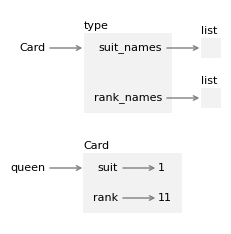

In [ ]:
from diagram import diagram, Bbox, make_list, adjust

width, height, x, y = [2.11, 2.14, 0.35, 1.76]
ax = diagram(width, height)
bbox = stack.draw(ax, x, y)

value = make_list([])
bbox2 = value.draw(ax, x+1.66, y)

value = make_list([])
bbox3 = value.draw(ax, x+1.66, y-0.5)

bbox = Bbox.union([bbox, bbox2, bbox3])
#adjust(x, y, bbox)

Cada instância de `Card` tem seus próprios atributos `suit` e `rank`, mas há apenas um objeto classe `Card` e apenas uma cópia das variáveis ​​de classe `suit_names` e `rank_names`.

## Comparando cartas

Suponha que criamos um segundo objeto `Card` com o mesmo naipe e classificação:

In [ ]:
queen2 = Card(1, 12)
print(queen2)

Queen of Diamonds


Se usarmos o operador `==` para compará-los, ele verifica se `queen` e `queen2` se referem ao mesmo objeto:

In [ ]:
queen == queen2

False

Eles não se referem ao mesmo objeto, então ele devolve `False`.
Podemos mudar esse comportamento definindo o método especial `__eq__`:

In [ ]:
%%add_method_to Card

    def __eq__(self, other):
        return self.suit == other.suit and self.rank == other.rank

`__eq__` recebe dois objetos `Card` como parâmetros e devolve `True` se eles tiverem o mesmo naipe e classificação, mesmo que não sejam o mesmo objeto.
Em outras palavras, ele verifica se eles são equivalentes, mesmo que não sejam idênticos.

Quando usamos o operador `==` com objetos `Card`, o Python chama o método `__eq__`:

In [ ]:
queen == queen2

True

Como segundo teste, vamos criar uma carta com o mesmo naipe e um valor diferente:

In [ ]:
six = Card(1, 6)
print(six)

6 of Diamonds


Podemos confirmar que `queen` e `six` não são equivalentes:

In [ ]:
queen == six

False

Se usarmos o operador `!=`, Python invoca um método especial chamado `__ne__`, se existir.
Caso contrário, ele invoca `__eq__` e inverte o resultado -- então se `__eq__` devolver `True`, o resultado do operador `!=` será `False`:

In [ ]:
queen != queen2

False

In [ ]:
queen != six

True

Agora, suponha que queremos comparar duas cartas para ver qual é maior.
Se usarmos um dos operadores relacionais, obtemos um `TypeError`:

In [ ]:
%%expect TypeError

queen < queen2

TypeError: '<' not supported between instances of 'Card' and 'Card'

Para alterar o comportamento do operador `<`, podemos definir um método especial chamado `__lt__`, que é a abreviação de "menor que (em inglês "*less than*").
Para o propósito deste exemplo, vamos supor que o naipe é mais importante que a classificação -- então todas as Espadas superam todos as Copas, que superam todos os Ouros, e assim por diante.
Se duas cartas tiverem o mesmo naipe, aquela com a classificação mais alta vence.

Para implementar essa lógica, usaremos o método a seguir, que devolve uma tupla contendo o naipe e a classificação de uma carta, nessa ordem:

In [ ]:
%%add_method_to Card

    def to_tuple(self):
        return (self.suit, self.rank)

Podemos usar este método para escrever `__lt__`:

In [ ]:
%%add_method_to Card

    def __lt__(self, other):
        return self.to_tuple() < other.to_tuple()

A comparação de tuplas compara os primeiros elementos de cada tupla, que representam os naipes.
Se forem iguais, ela compara os segundos elementos, que representam as classificações.

Agora, se usarmos o operador `<`, ele invoca o método `__lt__`:

In [ ]:
six < queen

True

Se usarmos o operador `>`, ele invoca um método especial chamado `__gt__`, se existir.
Caso contrário, ele invoca `__lt__` com os argumentos na ordem oposta:

In [ ]:
queen < queen2

False

In [ ]:
queen > queen2

False

Por fim, se usarmos o operador `<=`, ele invoca um método especial chamado `__le__`:

In [ ]:
%%add_method_to Card

    def __le__(self, other):
        return self.to_tuple() <= other.to_tuple()

Assim podemos verificar se uma carta é menor ou igual a outra:

In [ ]:
queen <= queen2

True

In [ ]:
queen <= six

False

Se usarmos o operador `>=`, ele usa `__ge__` se existir. Caso contrário, ele invoca `__le__` com os argumentos na ordem oposta:

In [ ]:
queen >= six

True

Conforme os definimos, esses métodos são completos no sentido de que podemos comparar quaisquer dois objetos `Card`, e consistentes no sentido de que os resultados de diferentes operadores não se contradizem.
Com essas duas propriedades, podemos dizer que os objetos `Card` são **totalmente ordenados**.
E isso significa, como veremos em breve, que eles podem ser ordenados.

## Baralhos

Agora que temos objetos que representam cartas, vamos definir objetos que representam baralhos.
A seguir está uma definição de classe para `Deck` com um método `__init__` que recebe uma lista de objetos `Card` como um parâmetro e a atribui a um atributo chamado `cards`:

In [ ]:
class Deck:

    def __init__(self, cards):
        self.cards = cards

Para criar uma lista que conté as 52 cartas de um baralho padrão, usaremos o seguinte método estático:

In [ ]:
%%add_method_to Deck

    def make_cards():
        cards = []
        for suit in range(4):
            for rank in range(2, 15):
                card = Card(suit, rank)
                cards.append(card)
        return cards

Em `make_cards`, o laço externo enumera os naipes de `0` a `3`.
O laço interno enumera as classificações de `2` a `14` -- em que `14` representa um Ás que supera um Rei.
Cada iteração cria uma nova `Card` com o naipe e classificação atuais e a acrescenta a `cards`.

Veja como fazemos uma lista de cartas e um objeto `Deck` que a contém:

In [ ]:
cards = Deck.make_cards()
deck = Deck(cards)
len(deck.cards)

52

O baralho contém 52 cartas, como pretendido.

## Exibindo o baralho

Aqui está um método `__str__` para `Deck`:

In [ ]:
%%add_method_to Deck

    def __str__(self):
        res = []
        for card in self.cards:
            res.append(str(card))
        return '\n'.join(res)

Este método demonstra uma maneira eficiente de acumular uma grande *string* -- construindo uma lista de *strings* e então usando o método de *string* `join`.

Testaremos este método com um baralho que contém apenas duas cartas:

In [ ]:
small_deck = Deck([queen, six])

Se chamarmos `str`, ele invoca `__str__`:

In [ ]:
str(small_deck)

'Queen of Diamonds\n6 of Diamonds'

Quando o Jupyter exibe uma *string*, ele mostra a forma "representacional" da *string*, que representa uma nova linha com a sequência `\n`.

No entanto, se exibirmos o resultado, o Jupyter mostra a forma "imprimível" da string, que exibe a nova linha como espaço em branco:

In [ ]:
print(small_deck)

Queen of Diamonds
6 of Diamonds


Então as cartas aparecem em linhas separadas.

## Adicionar, remover, embaralhar e ordenar

Para distribuir cartas, gostaríamos de um método que removesse uma carta do baralho e a devolvesse. O método de lista `pop` fornece uma maneira conveniente de fazer isso:

In [ ]:
%%add_method_to Deck

    def take_card(self):
        return self.cards.pop()

Veja como o usamos:

In [ ]:
card = deck.take_card()
print(card)

Ace of Spades


Podemos confirmar que restam `51` cartas no baralho:

In [ ]:
len(deck.cards)

51

Para adicionar uma carta, podemos usar o método de lista `append`:

In [ ]:
%%add_method_to Deck

    def put_card(self, card):
        self.cards.append(card)

Por exemplo, podemos recolocar a carta que acabamos de tirar:

In [ ]:
deck.put_card(card)
len(deck.cards)

52

Para embaralhar o baralho, podemos usar a função `shuffle` do módulo `random`:

In [ ]:
import random

In [ ]:
# Esta célula inicializa o gerador de números aleatórios para que
# sempre obtenhamos os mesmos resultados.

random.seed(3)

In [ ]:
%%add_method_to Deck

    def shuffle(self):
        random.shuffle(self.cards)

Se embaralharmos o baralho e exibirmos as primeiras cartas, veremos que elas não estão em nenhuma ordem aparente:

In [ ]:
deck.shuffle()
for card in deck.cards[:4]:
    print(card)

2 of Diamonds
4 of Hearts
5 of Clubs
8 of Diamonds


Para ordenar os cartas, podemos usar o método de lista `sort`, que odena os elementos "no lugar" -- ou seja, ele modifica a lista em vez de criar uma nova lista:

In [ ]:
%%add_method_to Deck

    def sort(self):
        self.cards.sort()

Quando invocamos `sort`, ele usa o método `__lt__` para comparar cartas:

In [ ]:
deck.sort()

Se exibirmos os primeiros cartões, podemos confirmar que eles estão em ordem crescente:

In [ ]:
for card in deck.cards[:4]:
    print(card)

2 of Clubs
3 of Clubs
4 of Clubs
5 of Clubs


Neste exemplo, `Deck.sort` não faz nada além de invocar `list.sort`.
Passar responsabilidade dessa forma é chamado de **delegação**.

## Mães e filhas

Herança é a capacidade de definir uma nova classe que é uma versão modificada de uma classe existente.
Como exemplo, digamos que queremos que uma classe represente uma "mão", ou seja, as cartas seguradas por um jogador.

* Uma mão é semelhante a um baralho -- ambas são compostas de uma coleção de cartas e ambas exigem operações como adicionar e remover cartas.

* Uma mão também é diferente de um baralho -- há operações que queremos para mãos que não fazem sentido para um baralho. Por exemplo, no pôquer, podemos comparar duas mãos para ver qual ganha. No bridge, podemos calcular uma pontuação para uma mão para fazer um lance.

Esse relacionamento entre classes -- onde uma é uma versão especializada da outra -- leva à herança.

Para definir uma nova classe que é baseada em uma classe existente, colocamos o nome da classe existente entre parênteses.

In [ ]:
class Hand(Deck):
    """Representa uma mão de cartas de baralho."""

Esta definição indica que `Hand` herda de `Deck`, o que significa que objetos `Hand` podem acessar métodos definidos em `Deck`, como `take_card` e `put_card`.

`Hand` também herda `__init__` de `Deck`, mas se definirmos `__init__` na classe `Hand`, ele sobrescreve o da classe `Deck`:

In [ ]:
%%add_method_to Hand

    def __init__(self, label=''):
        self.label = label
        self.cards = []

Esta versão de `__init__` recebe uma *string* opcional como parâmetro e sempre começa com uma lista vazia de cartas.
Quando criamos uma `Hand`, o Python invoca este método, não o de `Deck` -- o que podemos confirmar verificando se o resultado tem um atributo `label`:

In [ ]:
hand = Hand('player 1')
hand.label

'player 1'

To deal a card, we can use `take_card` to remove a card from a `Deck`, and `put_card` to add the card to a `Hand`.
Para distribuir uma carta, podemos usar `take_card` para remover uma carta de um `Deck` e `put_card` para adicionar a carta a uma `Hand`:

In [ ]:
deck = Deck(cards)
card = deck.take_card()
hand.put_card(card)
print(hand)

Ace of Spades


Vamos encapsular esse código em um método `Deck` chamado `move_cards`:

In [ ]:
%%add_method_to Deck

    def move_cards(self, other, num):
        for i in range(num):
            card = self.take_card()
            other.put_card(card)

Este método é polimórfico -- ou seja, ele funciona com mais de um tipo: `self` e `other` podem ser uma `Hand` ou um `Deck`.
Então podemos usar este método para distribuir uma carta de `Deck` para uma `Hand`, de uma `Hand` para outra, ou de uma `Hand` de volta para um `Deck`:

Quando uma nova classe herda de uma existente, a existente é chamada de **mãe** e a nova classe é chamada de **filha**. Em geral:

* Instâncias da classe filha devem ter todos os atributos da classe mãe, mas podem ter atributos adicionais.

* A classe filha deve ter todos os métodos da classe mãe, mas pode ter métodos adicionais.

* Se uma classe filha sobrescreve um método da classe mãe, o novo método deve usar os mesmos parâmetros e devolver um resultado compatível.

Este conjunto de regras é chamado de "princípio de substituição de Liskov" em homenagem à cientista da computação Barbara Liskov.

Se você seguir essas regras, qualquer função ou método projetado para trabalhar com uma instância de uma classe mãe, como um `Deck`, também funcionará com instâncias de uma classe filha, como `Hand`.
Se você violar essas regras, seu código entrará em colapso como um castelo de cartas (desculpe-me).

## Especialização

Vamos criar uma classe chamada `BridgeHand` que representa uma mão no bridge -- um jogo de cartas amplamente jogado.
Nós herdaremos de `Hand` e adicionaremos um novo método chamado `high_card_point_count` que avalia uma mão usando um método de "ponto de carta alta", que soma pontos para as cartas altas na mão.

Aqui está uma definição de classe que contém como uma variável de classe um dicionário que mapeia nomes de cartas para seus valores de pontos:

In [ ]:
class BridgeHand(Hand):
    """Representa uma mão de bridge."""

    hcp_dict = {
        'Ace': 4,
        'King': 3,
        'Queen': 2,
        'Jack': 1,
    }

Dada a classificação de uma carta, como `12`, podemos usar `Card.rank_names` para obter a representação em string da classificação e, então, usar `hcp_dict` para obter sua pontuação:

In [ ]:
rank = 12
rank_name = Card.rank_names[rank]
score = BridgeHand.hcp_dict.get(rank_name, 0)
rank_name, score

('Queen', 2)

O método a seguir percorre as cartas em um `BridgeHand` e soma suas pontuações:

In [ ]:
%%add_method_to BridgeHand

    def high_card_point_count(self):
        count = 0
        for card in self.cards:
            rank_name = Card.rank_names[card.rank]
            count += BridgeHand.hcp_dict.get(rank_name, 0)
        return count

In [ ]:
# Esta célula cria um novo Deck e
# inicializa o gerador de números aleatórios

cards = Deck.make_cards()
deck = Deck(cards)
random.seed(3)

Para testar, vamos distribuir uma mão com cinco cartas -- uma mão de bridge geralmente tem treze, mas é mais fácil testar o código com pequenos exemplos:

In [ ]:
hand = BridgeHand('player 2')

deck.shuffle()
deck.move_cards(hand, 5)
print(hand)

4 of Diamonds
King of Hearts
10 of Hearts
10 of Clubs
Queen of Diamonds


E aqui está a pontuação total do Rei e da Rainha:

In [ ]:
hand.high_card_point_count()

5

`BridgeHand` herda as variáveis ​​e métodos de `Hand` e adiciona uma variável de classe e um método que são específicos para bridge.
Essa maneira de usar herança é chamada de **especialização** porque define uma nova classe que é especializada para um uso particular, como jogar bridge.

## Depuração

A herança é um recurso útil.
Alguns programas que seriam repetitivos sem herança podem ser escritos de forma mais concisa com ela.
Além disso, a herança pode facilitar a reutilização de código, já que você pode personalizar o comportamento de uma classe mãe sem precisar modificá-la.
Em alguns casos, a estrutura de herança reflete a estrutura natural do problema, o que torna o projeto mais fácil de entender.

Por outro lado, a herança pode tornar os programas difíceis de ler.
Quando um método é invocado, às vezes não fica claro onde encontrar sua definição -- o código relevante pode estar espalhado por vários módulos.

Sempre que você não tiver certeza sobre o fluxo de execução em seu programa, a solução mais simples é adicionar instruções `print` no início dos métodos relevantes.
Se `Deck.shuffle` exibir uma mensagem que diga algo como `Running Deck.shuffle`, então, conforme o programa é executado, ele rastreia o fluxo de execução.

Como alternativa, você pode usar a função a seguir, que recebe um objeto e um nome de método (como uma *string*) e devolve a classe que fornece a definição do método.

In [ ]:
def find_defining_class(obj, method_name):
    """Encontra a classe onde o método fornecido é definido."""
    for typ in type(obj).mro():
        if method_name in vars(typ):
            return typ
    return f'Method {method_name} not found.'

`find_defining_class` usa o método `mro` para obter a lista de objetos classe (tipos) que serão pesquisados ​​por métodos.
"MRO" significa "*method resolution order*", que é a sequência de classes que o Python pesquisa para "resolver" um nome de método -- ou seja, para encontrar o objeto de função ao qual o nome se refere.

Como exemplo, vamos instanciar um `BridgeHand` e então encontrar a definição da classe `shuffle`.

In [ ]:
hand = BridgeHand('player 3')
find_defining_class(hand, 'shuffle')

__main__.Deck

O método `shuffle` para o objeto `BridgeHand` é o mesmo em `Deck`.

## Glossário

**herança** (*inheritance*)**:**
A capacidade de definir uma nova classe que é uma versão modificada de uma classe previamente definida.

**codificar** (*encode*)**:**
Representar um conjunto de valores usando outro conjunto de valores construindo um mapeamento entre eles.

**variável de classe** (*class variable*)**:**
Uma variável definida dentro de uma definição de classe, mas não dentro de um método.

**totalmente ordenado** (*totally ordered*)**:**
Um conjunto de objetos é totalmente ordenado se pudermos comparar quaisquer dois elementos e os resultados forem consistentes.

**delegação** (*delegation*)**:**
Quando um método passa a responsabilidade para outro método para fazer a maior parte ou todo o trabalho.

**classe mãe** (*parent class*)**:**
Uma classe da qual se herda.

**classe filha** (*child class*)**:**
Uma classe que herda de outra classe.

**especialização** (*specialization*)**:**
Uma maneira de usar herança para criar uma nova classe que é uma versão especializada de uma classe existente.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-a antes de trabalhar nos
# exercícios.

%xmode Verbose

Exception reporting mode: Verbose


### Pergunte a um assistente virtual

Quando corre bem, a programação orientada a objetos pode tornar os programas mais legíveis, testáveis ​​e reutilizáveis.
Mas também pode tornar os programas complicados e difíceis de manter.
Como resultado, a POO é um tópico de controverso -- algumas pessoas adoram, outras não.

Para saber mais sobre o tópico, pergunte a um assistente virtual:

* Quais são alguns prós e contras da programação orientada a objetos? (*What are some pros and cons of object-oriented programming?*)

* O que significa quando as pessoas dizem "favorecer a composição em vez da herança"? (What does it mean when people say "favor composition over inheritance"?)

* O que é o princípio de substituição de Liskov? (*What is the Liskov substitution principle?*)

* Python é uma linguagem orientada a objetos? (*Is Python an object-oriented language?*)

* Quais são os requisitos para que um conjunto seja totalmente ordenado? (*What are the requirements for a set to be totally ordered?*)

E, como sempre, considere usar um assistente virtual para ajudar com os exercícios a seguir.

### Exercício

No bridge de contrato, um truque é uma rodada do jogo em que cada um dos quatro jogadores joga uma carta.
Para representar essas cartas, definiremos uma classe que herda de `Deck`.:

In [ ]:
class Trick(Deck):
    """RRepresenta um truque no bridge de contrato."""

Como exemplo, considere este truque, onde o primeiro jogador lidera com o 3 de Ouros, o que significa que os Ouros são o "naipe inicial".
O segundo e o terceiro jogadores "seguem o naipe", o que significa que eles jogam uma carta com o naipe inicial.
O quarto jogador joga uma carta de um naipe diferente, o que significa que eles não podem ganhar o truque.
Então o vencedor deste truque é o terceiro jogador, porque ele jogou a carta mais alta no naipe inicial:

In [ ]:
cards = [Card(1, 3),
         Card(1, 10),
         Card(1, 12),
         Card(2, 13)]
trick = Trick(cards)
print(trick)

3 of Diamonds
10 of Diamonds
Queen of Diamonds
King of Hearts


Escreva um método `Trick` chamado `find_winner` que percorre as cartas no `Trick` e devolve o índice da carta que ganha.
No exemplo anterior, o índice da carta vencedora é `2`:

Você pode usar o seguinte esboço para começar:

In [ ]:
%%add_method_to Trick

    def find_winner(self):
        return 0

In [ ]:
# Solução

%%add_method_to Trick

    def find_winner(self):
        lead = self.cards[0]

        top_index = 0
        top_rank = lead.rank

        for i, card in enumerate(self.cards):
            if card.suit == lead.suit and card.rank > top_rank:
                top_index = i
                top_rank = card.rank

        return top_index

Se você testar seu método com o exemplo anterior, o índice da carta vencedora deverá ser `2`:

In [ ]:
trick.find_winner()

2

### Exercício

Os próximos exercícios pedem para você escrever funções que ordenam mãos de pôquer.
Se você não está familiarizado com pôquer, explicarei o que você precisa saber.
Usaremos a seguinte classe para representar mãos de pôquer:

In [ ]:
class PokerHand(Hand):
    """Representa uma mão de pôquer."""

    def get_suit_counts(self):
        counter = {}
        for card in self.cards:
            key = card.suit
            counter[key] = counter.get(key, 0) + 1
        return counter

    def get_rank_counts(self):
        counter = {}
        for card in self.cards:
            key = card.rank
            counter[key] = counter.get(key, 0) + 1
        return counter

`PokerHand` possui dois métodos que ajudarão com os exercícios.

* `get_suit_counts` percorre as cartas no `PokerHand`, conta o número de cartas em cada naipe e devolve um dicionário que mapeia cada código de naipe para o número de vezes que ele aparece.

* `get_rank_counts` faz a mesma coisa com as classificações das cartas, devolvendo um dicionário que mapeia cada código de classificação para o número de vezes que ele aparece.

Todos os exercícios a seguir podem ser feitos usando apenas os recursos do Python que aprendemos até agora, mas alguns deles são mais difíceis do que a maioria dos exercícios anteriores.
Eu o encorajo a pedir ajuda a um assitente virtual.

Para problemas como esse, geralmente funciona bem pedir conselhos gerais sobre estratégias e algoritmos.
Então você pode escrever o código sozinho ou pedir código.
Se você pedir código, talvez queira fornecer as definições de classe relevantes como parte do *prompt*.

Como primeiro exercício, escreveremos um método chamado `has_flush` que verifica se uma mão tem um "*flush*" -- ou seja, se contém pelo menos cinco cartas do mesmo naipe.

Na maioria das variedades de pôquer, uma mão contém cinco ou sete cartas, mas há algumas variações exóticas em que uma mão contém outros números de cartas.
Mas, independentemente de quantas cartas há em uma mão, as únicas que contam são as cinco que formam a melhor mão.

Você pode usar o seguinte esboço para começar:

In [ ]:
%%add_method_to PokerHand

    def has_flush(self):
        """Verifica se esta mão tem um flush."""
        return False

In [ ]:
%%add_method_to PokerHand

    def has_flush(self):
        """Verifica se esta mão tem um flush."""
        counter = self.get_suit_counts()
        for count in counter.values():
            if count >= 5:
                return True
        return False

Para testar esse método, construiremos uma mão com cinco cartas, todas de Paus, para que ela contenha um flush:

In [ ]:
good_hand = PokerHand('good_hand')

suit = 0
for rank in range(10, 15):
    card = Card(suit, rank)
    good_hand.put_card(card)

print(good_hand)

10 of Clubs
Jack of Clubs
Queen of Clubs
King of Clubs
Ace of Clubs


Se invocarmos `get_suit_counts`, podemos confirmar que o código de classificação `0` aparece `5` vezes:

In [ ]:
good_hand.get_suit_counts()

{0: 5}

Então `has_flush` deve devolver `True`:

In [ ]:
good_hand.has_flush()

True

Como segundo teste, construiremos uma mão com três paus e dois outros naipes:

In [ ]:
cards = [Card(0, 2),
         Card(0, 3),
         Card(2, 4),
         Card(3, 5),
         Card(0, 7),
        ]

bad_hand = PokerHand('bad hand')
for card in cards:
    bad_hand.put_card(card)

print(bad_hand)

2 of Clubs
3 of Clubs
4 of Hearts
5 of Spades
7 of Clubs


Então `has_flush` deve devolver `False`:

In [ ]:
bad_hand.has_flush()

False

### Exercício

Escreva um método chamado `has_straight` que verifica se uma mão contém um *straight*, que é um conjunto de cinco cartas com classificações consecutivas.
Por exemplo, se uma mão contém classificações `5`, `6`, `7`, `8` e `9`, ela contém um *straight*.

Um Ás pode vir antes de um dois ou depois de um Rei, então `Ás`, `2`, `3`, `4`, `5` é um *straight*, assim como `10`, `Valete`, `Rainha`, `Rei`, `Ás`.
Mas um *straight* não pode "dar a volta", então `Rei`, `Ás`, `2`, `3`, `4` não é um *straight*.

Você pode usar o seguinte esboço para começar.
Ele inclui algumas linhas de código que contam o número de Ases -- representados com o código `1` ou `14` -- e armazenam o total em ambos os locais do contador:

In [ ]:
%%add_method_to PokerHand

    def has_straight(self, n=5):
        """Verifica se esta mão tem um straight com pelo menos `n` cartas."""
        counter = self.get_rank_counts()
        aces = counter.get(1, 0) + counter.get(14, 0)
        counter[1] = aces
        counter[14] = aces

        return False

In [ ]:
# Solução

%%add_method_to PokerHand

    def has_straight(self, n=5):
        """Checks whether this hand has a straight."""
        counter = self.get_rank_counts()
        aces = counter.get(1, 0) + counter.get(14, 0)
        counter[1] = aces
        counter[14] = aces

        in_a_row = 0
        for i in range(1, 15):
            if counter.get(i, 0):
                in_a_row += 1
                if in_a_row == n:
                    return True
            else:
                in_a_row = 0
        return False

`good_hand`, que criamos para o exercício anterior, contém uma sequência.
Se usarmos `get_rank_counts`, podemos confirmar que ele tem pelo menos uma carta com cada uma das cinco classificações consecutivas:

In [ ]:
good_hand.get_rank_counts()

{10: 1, 11: 1, 12: 1, 13: 1, 14: 1}

Então `has_straight` deve devolver `True`:

In [ ]:
good_hand.has_straight()

True

`bad_hand` não contém um *straight*, então `has_straight` deve devolver `False`.

In [ ]:
bad_hand.has_straight()

False

### Exercício

Uma mão tem um *straight flush* se contiver um conjunto de cinco cartas que são um *straight* e um *flush* -- isto é, cinco cartas do mesmo naipe com classificações consecutivas.
Escreva um método `PokerHand` que verifica se uma mão tem um *straight flush*.

Você pode usar o seguinte esboço para começar:

In [ ]:
%%add_method_to PokerHand

    def has_straightflush(self):
        """Verifica se esta mão tem um straight flush."""
        return False

In [ ]:
# Solução

%%add_method_to PokerHand

    def partition(self):
        """Faz uma lista de quatro mãos, cada uma contendo apenas um naipe."""
        hands = []
        for i in range(4):
            hands.append(PokerHand())

        for card in self.cards:
            hands[card.suit].put_card(card)

        return hands

In [ ]:
# Solução

%%add_method_to PokerHand

    def has_straightflush(self):
        """Check whether this hand has a straight flush."""
        for hand in self.partition():
            if hand.has_straight():
                return True
        return False

Use os exemplos a seguir para testar seu método:

In [ ]:
good_hand.has_straightflush()     # deve devolver True

True

In [ ]:
bad_hand.has_straightflush()     # deve devolver False

False

Note que não é suficiente verificar se uma mão tem um *straight* e um *flush*.
Para ver o porquê, considere a seguinte mão.

In [ ]:
from copy import deepcopy

straight_and_flush = deepcopy(bad_hand)
straight_and_flush.put_card(Card(0, 6))
straight_and_flush.put_card(Card(0, 9))
print(straight_and_flush)

2 of Clubs
3 of Clubs
4 of Hearts
5 of Spades
7 of Clubs
6 of Clubs
9 of Clubs


Esta mão contém um *straight* e um *flush*, mas não são as mesmas cinco cartas:

In [ ]:
straight_and_flush.has_straight(), straight_and_flush.has_flush()

(True, True)

Portanto, não contém um *straight flush*:

In [ ]:
straight_and_flush.has_straightflush()    # deve devolver False

False

### Exercício

Uma mão de pôquer tem um par se contiver duas ou mais cartas com o mesmo valor.
Escreva um método `PokerHand` que verifica se uma mão contém um par.

Você pode usar o seguinte esboço para começar:

In [ ]:
%%add_method_to PokerHand

    def check_sets(self, *need_list):
        return True

In [ ]:
# Solução

%%add_method_to PokerHand

    def check_sets(self, *need_list):
        counts = self.get_rank_counts()
        set_list = sorted(counts.values(), reverse=True)

        for need, have in zip(need_list, set_list):
            if need > have:
                return False
        return True

In [ ]:
# Solução

%%add_method_to PokerHand

    def has_pair(self):
        return self.check_sets(2)

Para testar seu método, aqui está uma mão que tem um par:

In [ ]:
pair = deepcopy(bad_hand)
pair.put_card(Card(1, 2))
print(pair)

2 of Clubs
3 of Clubs
4 of Hearts
5 of Spades
7 of Clubs
2 of Diamonds


In [ ]:
pair.has_pair()    # deve devolver True

True

In [ ]:
bad_hand.has_pair()    # deve devolver False

False

In [ ]:
good_hand.has_pair()   # should return False

False

### Exercício

Uma mão tem um *full house* se contiver três cartas de um valor e duas cartas de outro valor.
Escreva um método `PokerHand` que verifica se uma mão tem um *full house*.

Você pode usar o seguinte esboço para começar:

In [ ]:
%%add_method_to PokerHand

    def has_full_house(self):
        return False

In [ ]:
# Solution

%%add_method_to PokerHand

    def has_full_house(self):
        return self.check_sets(3, 2)

Você pode usar esta mão para testar seu método:

In [ ]:
boat = deepcopy(pair)
boat.put_card(Card(2, 2))
boat.put_card(Card(2, 3))
print(boat)

2 of Clubs
3 of Clubs
4 of Hearts
5 of Spades
7 of Clubs
2 of Diamonds
2 of Hearts
3 of Hearts


In [ ]:
boat.has_full_house()     # deve devolver True

True

In [ ]:
pair.has_full_house()     # deve devolver False

False

In [ ]:
good_hand.has_full_house()     # deve devolver False

False

### Exercício

Este exercício é um conto de advertência sobre um erro comum que pode ser difícil de depurar.
Considere a seguinte definição de classe:

In [ ]:
class Kangaroo:
    """Um Canguru é um marsupial."""

    def __init__(self, name, contents=[]):
        """Inicializar o conteúdo da bolsa.

        name: string
        contents: conteúdo inicial da bolsa.
        """
        self.name = name
        self.contents = contents

    def __str__(self):
        """Retorna uma string representando este Canguru.
        """
        t = [ self.name + ' has pouch contents:' ]
        for obj in self.contents:
            s = '    ' + object.__str__(obj)
            t.append(s)
        return '\n'.join(t)

    def put_in_pouch(self, item):
        """Adiciona um novo item ao conteúdo da bolsa.

        item: objeto a ser adicionado
        """
        self.contents.append(item)

`__init__` recebe dois parâmetros: `name` é obrigatório, mas `contents` é opcional -- se não for fornecido, o valor padrão é uma lista vazia.

`__str__` devolve uma *string* representando o objeto que inclui o nome e o conteúdo da bolsa.

`put_in_pouch` recebe qualquer objeto e o acrescenta a `contents`.

Agora vamos ver como essa classe funciona.
Criaremos dois objetos `Kangaroo` com os nomes `'Kanga'` e `'Roo'`:

In [ ]:
kanga = Kangaroo('Kanga')
roo = Kangaroo('Roo')

À bolsa de Kanga adicionaremos duas *strings* e Roo:

In [ ]:
kanga.put_in_pouch('wallet')
kanga.put_in_pouch('car keys')
kanga.put_in_pouch(roo)

Se exibirmos `kanga`, parece que tudo funcionou:

In [ ]:
print(kanga)

Kanga has pouch contents:
    'wallet'
    'car keys'


Mas o que acontece se exibirmos `roo`?

In [ ]:
print(roo)

Roo has pouch contents:
    'wallet'
    'car keys'


A bolsa de Roo contém o mesmo conteúdo que a de Kanga, incluindo uma referência a `roo`!

Veja se consegue descobrir o que deu errado.
Então pergunte a um assistente virtual, "O que há de errado com o programa a seguir?" ("*What's wrong with the following program?*") e cole a definição de `Kangaroo`.

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)